In [3]:
pip install glove_python_binary

     |████████████████████████████████| 948 kB 7.4 MB/s 


In [4]:
import gensim
from glove import Corpus, Glove
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
data = pd.read_csv('wiki_small800.txt', header = None)
data

,0
0,"실수축 위 에서 감마 함수 의 그래프 수학 에서 , 감마 함수 ( Γ 函數 는 계승..."
1,"아쿠타가와 류노스케 ( , 1 8 9 2 년 3 월 1 일 ~ 1 9 2 7 년 7..."
2,"장국영 ( , , , 1 9 5 6 년 9 월 1 2 일 ~ 2 0 0 3 년 4 ..."
3,"2 0 0 px 통계학 ( 統計 學 은 산술 적 방법 을 기초 로 하 여 , 주로 ..."
4,"컴퓨터 과학 ( ) 은 전산 이론 , 하드웨어 및 소프트웨어 에 중점 을 둔 정보 ..."
...,...
746,"알베르트 아인슈타인 ( , , 1 8 7 9 년 3 월 1 4 일 ~ 1 9 5 5..."
747,Hello World Program . png | 섬네일 | right | 4 0 ...
748,널리 받아들여 지 는 유럽 의 정의 : - 녹색 은 지리 적 유럽 - 진한 파랑 색...
749,"첫째 줄 기독교 , 유대교 , 힌두교 , 바하이교 둘째 줄 이슬람 , 영지주의 , ..."


In [7]:
data = gensim.models.word2vec.Text8Corpus('wiki_small800.txt')

In [10]:
corpus = Corpus()
corpus.fit(data, window = 10)

In [11]:
glove = Glove(no_components = 5, learning_rate = 0.05)
glove.fit(corpus.matrix, epochs = 50, no_threads = 5, verbose = True)

Performing 50 training epochs with 5 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


In [12]:
glove.add_dictionary(corpus.dictionary)
glove.save('gv_model')

In [14]:
glove.most_similar('드라마')

[('th', 0.9968031411769468),
 ('영화제', 0.9966565720728815),
 ('남동생', 0.9964353585856243),
 ('프란츠', 0.9953241731793823)]

In [15]:
glove.word_vectors

array([[ 0.16263715,  0.15849496, -0.03084178, -0.15580741, -0.13524347],
       [-0.76941783, -0.61495256, -0.55550968,  0.77843789,  0.6334957 ],
       [-0.99376198, -0.6762886 , -0.36285192,  1.39356243,  1.2562571 ],
       ...,
       [ 0.03567913,  0.01828576, -0.00706193,  0.04738132, -0.03766902],
       [ 0.047674  ,  0.05087127,  0.11766513, -0.00749683,  0.04456346],
       [ 0.17001176,  0.14524991,  0.00430965, -0.07920054, -0.18761225]])

In [17]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [20]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [21]:
from gensim.models import KeyedVectors

# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False,limit=5000)

In [22]:
model.most_similar(positive=['king', 'women'], negative=['man'], topn=1)

[('queen', 0.5805264711380005)]

In [24]:
model.most_similar(positive=['queen', 'man'], negative=['man'], topn=1)

[('princess', 0.7947245240211487)]

In [25]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd


# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:200,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


5000
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459]


In [27]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
print(df.shape)
print(df.head())


(200, 2)
            x         y
the -0.876075  1.374907
,    3.694338  2.585371
.    3.229867  2.658187
of  -1.116862  1.016126
to   0.530927 -7.913053


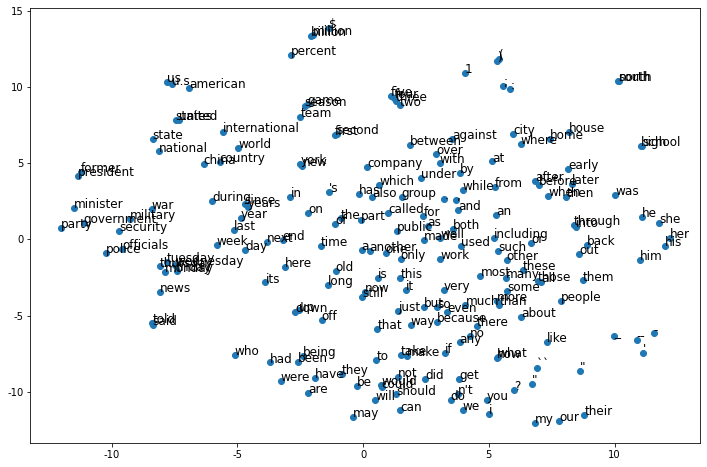

In [28]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=12)
plt.show()